In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('data\song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
popularity_percentile = 80
pop_crit = np.percentile(df['song_popularity'],popularity_percentile)

df1=df

def trans(x):
    if x>pop_crit:
        return 1
    else:
        return 0

df1['song_popularity']=df1['song_popularity'].apply(trans)
df1.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18830,Let It Breathe,0,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,0,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),0,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,0,352280,0.945,0.488,0.326,0.015700,3,0.119,-12.020,1,0.0328,106.063,4,0.323
18834,Up to Me,0,193533,0.911,0.640,0.381,0.000254,4,0.104,-11.790,1,0.0302,91.490,4,0.581


In [4]:
X=df1[df1.columns[2:]].values #song_popularity
y=df1[df1.columns[1]].values #other features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    shuffle=True,random_state=123, stratify=y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(StandardScaler(),
                  KNeighborsClassifier())

pipe.fit(X_train,y_train)
acc=np.sum(pipe.predict(X_test)==y_test)/y_test.shape[0]
print('%.2f%%'%acc)

0.85%


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kneighborsclassifier__p': [1,2],
              'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  refit=True,#default
                  cv=10,#k-fold cross validation, strtified, accuracy
                  n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))#available after fitting
print('Best Params:', gs.best_params_)#get the parameter combination

Best Accuracy: 88.46%
Best Params: {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 2}


In [7]:
for i in range(len(gs.cv_results_['mean_test_score'])):#average on k-fold
    print(gs.cv_results_['mean_test_score'][i], gs.cv_results_['params'][i]) 

0.8720419202941485 {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 1}
0.8723454679534894 {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 2}
0.8390484698367849 {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1}
0.8418543730535732 {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 2}
0.8299454339000093 {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 1}
0.8304764841162374 {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 2}
0.8269119706035635 {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 1}
0.8313112545601177 {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 2}
0.8253184172954864 {'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 1}
0.8288835060358644 {'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 2}
0.8212984960096454 {'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__p': 1}
0.8264564

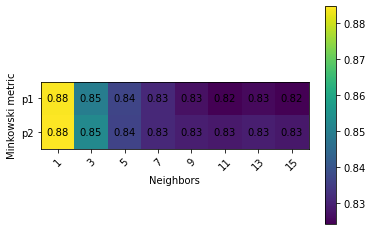

In [7]:
from mlxtend.plotting import heatmap
import numpy as np
import pandas as pd

grid = np.zeros((2, 8))
grid[0, :] = gs.cv_results_['mean_test_score'][0::2]
grid[1, :] = gs.cv_results_['mean_test_score'][1::2]


heatmap(grid, 
        column_names=[1, 3, 5, 7, 9, 11, 13, 15], 
        row_names=['p1','p2'])
plt.ylabel('Minkowski metric')
plt.xlabel('Neighbors')
plt.savefig('best_parameter_kNN.pdf')
plt.show()

very stange, don't know why

In [8]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, None],
               'criterion': ['gini', 'entropy']}#None means no restrain


gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),
                  param_grid=param_grid,
                  refit=True,#default
                  cv=10,#k-fold cross validation, strtified, accuracy
                  n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))#available after fitting
print('Best Params:', gs.best_params_)#get the parameter combination

acc=np.sum(gs.best_estimator_.predict(X_test)==y_test)/y_test.shape[0]
print('acc=%.2f%%'%acc)
print('best estimator score is %.2f%%'%gs.best_estimator_.score(X_test,y_test))

Best Accuracy: 87.98%
Best Params: {'criterion': 'gini', 'max_depth': None}
acc=0.89%
best estimator score is 0.89%


In [9]:
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier(random_state=123,n_jobs=-1)

clf1.fit(X_train,y_train)
acc=np.sum(clf1.predict(X_test)==y_test)/y_test.shape[0]
print('%.2f%%'%acc)

0.95%


In [10]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

popular number in test set 517
unpopular number in test set 2309
accuracy in test set is 95.08%


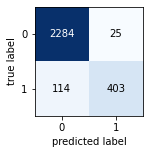

In [11]:
conf=confusion_matrix(y_test, clf1.predict(X_test))
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(2, 2))
print('popular number in test set',np.sum(y_test==1))
print('unpopular number in test set',np.sum(y_test==0))
score=clf1.score(X_test,y_test)*100
print('accuracy in test set is %.2f%%' %score)
plt.savefig('random.png')
plt.show()

In [12]:
clf1.score(X_test,y_test)

0.9508138711960368